# Visualizzazione delle linee di forza generate dal campo elettrico

Abbiamo visto che il campo elettrico è definito operativamente come la forza esercitata su una carica puntiforme e positiva $q$, normalizzata rispetto al valore stesso della carica.

Utilizzando la legge di Coulomb, possiamo quindi esprimere il campo elettrico generato da una carica puntiforme $Q$ e "percepito" da $q$ come

$$
\bar{E} = \frac{\bar{F}}{q} = \frac{1}{4\pi\epsilon_0} \frac{Q}{r^2} \hat{r}~~.
$$

Abbiamo anche visto che il campo elettrico dovuto a un insieme di cariche è dato dalla sovrapposizione degli effetti dovuti alle singole cariche, ossia

$$
\bar{E} = \sum_{k=1}^N \bar{E}_k = \frac{1}{4\pi\epsilon_0} \sum_{k=1}^N \frac{Q_k}{r_k^2} \hat{r}_k~~.
$$

Vediamo quindi alcuni esempi di campi elettrici generati da diverse configurazioni di cariche puntiformi.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline

Definisco i valori della carica dell'elettrone e della costante dielettrica del vuoto

In [2]:
q0 = -1.602564e-19   # [C]
epsilon0 = 8.854e-12 # [N^-1 m^-2 C2]

Definisco una funzione che calcola il campo elettrico nel punto $y$ dovuto alla presenza nel punto $x$ di una carica puntiforme $Q$

In [3]:
def E_field(y, x=np.zeros(2), Q=q0, epsilon=epsilon0):
    r = y - x
    E = Q * r / (4 * np.pi * epsilon * np.linalg.norm(r)**3)
    return E

Definisco una funzione che calcola il campo elettrico generato da più cariche puntiformi su una griglia di punti

In [4]:
def compute_E_field_on_a_grid(charges, charge_positions, limits, n_points):
    x = np.linspace(limits[0,0], limits[0,1], n_points[0])
    y = np.linspace(limits[1,0], limits[1,1], n_points[1])
    X,Y = np.meshgrid(x, y)
    U = np.zeros((n_points[1],n_points[0]))
    V = np.zeros((n_points[1],n_points[0]))
    for pos,charge in zip(charge_positions, charges):
        for i in range(n_points[1]):
            for j in range(n_points[0]):
                pt = np.array([X[i,j],Y[i,j]])
                tmp_U,tmp_V = E_field(pt, pos, charge)
                U[i,j] += tmp_U
                V[i,j] += tmp_V
    return X,Y,U,V

Definisco una funzione che visualizza le cariche e le linee del campo elettrico

In [5]:
def plot_E_field(X, Y, U, V, limits=None, charges=None, charge_positions=None, ax=None, density=1):
    color = 2 * np.log(np.hypot(U, V))
    if ax is None:
        _,ax = plt.subplots(1,1,figsize=(8,8))
    ax.streamplot(X, Y, U, V, color=color, linewidth=1, cmap=plt.cm.inferno, \
                  density=density, arrowstyle='->', arrowsize=1)
    if charges is not None and charge_positions is not None:
        for pos,charge in zip(charge_positions,charges):
            if charge > 0:
                col = 'r'
            else:
                col = 'b'
            ax.plot(pos[0], pos[1], col+'o', markersize=5*np.abs(charge)/np.abs(q0))
    if limits is not None:
        ax.set_xlim(limits[0])
        ax.set_ylim(limits[1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

### Campi generati da due cariche (una positiva e una negativa) isolate nello spazio

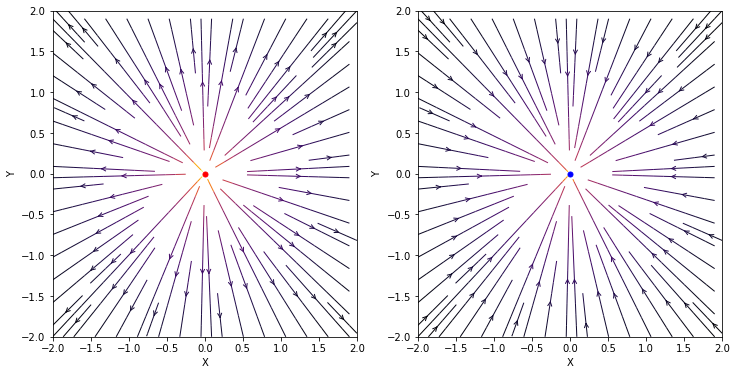

In [6]:
charge = np.array([-q0])
charge_position = np.array([[0,0]])
limits = np.array([[-2,2],[-2,2]])
n_points = np.array([100,100])

_,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

X,Y,U,V = compute_E_field_on_a_grid(charge, charge_position, limits, n_points)
plot_E_field(X, Y, U, V, limits, charge, charge_position, ax1)

charge[0] = q0
X,Y,U,V = compute_E_field_on_a_grid(charge, charge_position, limits, n_points)
plot_E_field(X, Y, U, V, limits, charge, charge_position, ax2)

### Campo generato da un dipolo elettrico

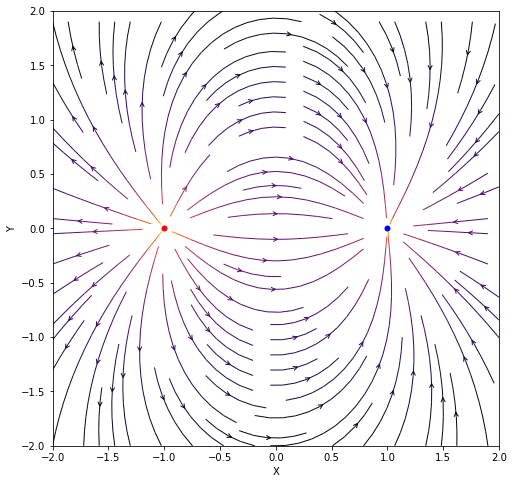

In [7]:
charges = np.array([-q0, q0])
charge_positions = np.array([[-1,0],[1,0]])
limits = np.array([[-2,2],[-2,2]])
n_points = np.array([100,100])
X,Y,U,V = compute_E_field_on_a_grid(charges, charge_positions, limits, n_points)
plot_E_field(X, Y, U, V, limits, charges, charge_positions)

### Campo generato da $N = 2^m$ cariche disposte su una circoferenza e aventi segni alternati

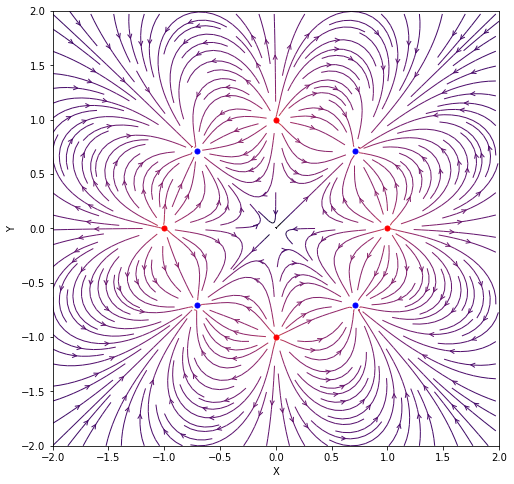

In [8]:
m = 3
n_charges = 2**m
charges = q0 * np.ones(n_charges)
charges[::2] *= -1
theta = np.linspace(0, 2*np.pi, n_charges+1)[:-1]
charge_positions = np.array([np.cos(theta), np.sin(theta)]).T
limits = np.array([[-2,2],[-2,2]])
n_points = np.array([100,100])
X,Y,U,V = compute_E_field_on_a_grid(charges, charge_positions, limits, n_points)
plot_E_field(X, Y, U, V, limits, charges, charge_positions, density=2)

### Campo generato da $N$ cariche disposte in modo casuale in una regione limitata di spazio

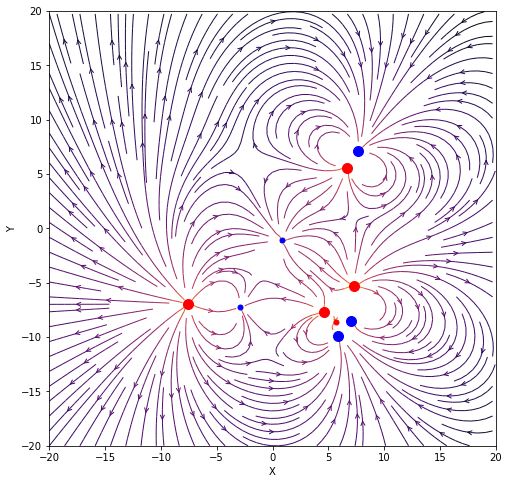

In [9]:
n_charges = 10
charges = q0 * np.random.randint(1, 3, size=n_charges)
idx = np.random.choice(range(n_charges), size=int(n_charges/2), replace=False)
charges[idx] *= -1
charge_positions = -10 + 20*np.random.uniform(size=(n_charges,2))
limits = np.array([[-2,2],[-2,2]]) * 10
n_points = np.array([100,100])
X,Y,U,V = compute_E_field_on_a_grid(charges, charge_positions, limits, n_points)
plot_E_field(X, Y, U, V, limits, charges, charge_positions, density=2)